In [4]:

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from glob import glob

In [18]:
import cv2
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

In [15]:
train_path = 'D:/работа/учеба/ИИ/Статья Садеков Определение эмоций/Самый большой датасет/'
labels = os.listdir(train_path)
labels = ['surprise', 'fear', 'neutral', 'sad', 'disgust', 'contempt', 'happy', 'anger']
labels

['surprise', 'fear', 'neutral', 'sad', 'disgust', 'contempt', 'happy', 'anger']

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

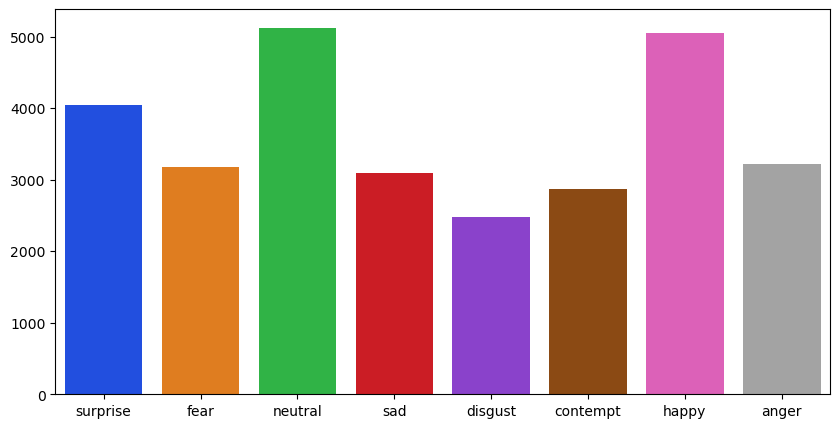

In [16]:
labels_count = []
for i in labels:
    count = len(os.listdir(train_path + '/' + i))
    labels_count.append(count)
    fig = plt.figure(figsize = (10, 5))
ax = sns.barplot(y = labels_count, x = labels, palette = 'bright')
ax.bar_label(ax.containers[0], fmt='%g', label_type = 'edge')
plt.show()

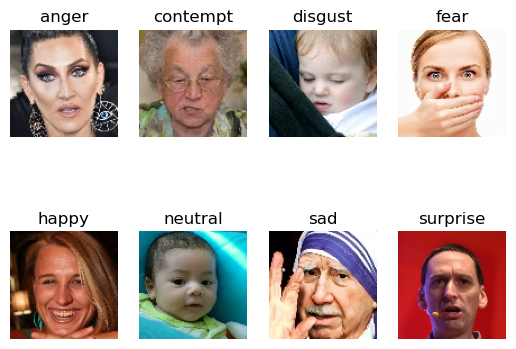

In [19]:
img1 = load_img(train_path+"/anger/image0000006.jpg")
img2 = load_img(train_path+'/contempt/ffhq_6.png')
img3 = load_img(train_path+'/disgust/ffhq_0.png')
img4 = load_img(train_path+'/fear/image0000284.jpg')
img5 = load_img(train_path+'/happy/ffhq_0.png')
img6 = load_img(train_path+'/neutral/ffhq_0.png')
img7 = load_img(train_path+'/sad/image0000013.jpg')
img8 = load_img(train_path+'/surprise/ffhq_1.png')
plt.figure()
plt.subplot(2, 4, 1)
plt.imshow(img1) # indirilen resim çizdiriliyor
plt.title('anger')
plt.axis("off")
plt.subplot(2, 4, 2)
plt.imshow(img2) # indirilen resim çizdiriliyor
plt.title('contempt')
plt.axis("off")
plt.subplot(2, 4, 3)
plt.imshow(img3) # indirilen resim çizdiriliyor
plt.title('disgust')
plt.axis("off")
plt.subplot(2, 4, 4)
plt.imshow(img4) # indirilen resim çizdiriliyor
plt.title('fear')
plt.axis("off")
plt.subplot(2, 4, 5)
plt.imshow(img5) # indirilen resim çizdiriliyor
plt.title('happy')
plt.axis("off")
plt.subplot(2, 4, 6)
plt.imshow(img6) # indirilen resim çizdiriliyor
plt.title('neutral')
plt.axis("off")
plt.subplot(2, 4, 7)
plt.imshow(img7) # indirilen resim çizdiriliyor
plt.title('sad')
plt.axis("off")
plt.subplot(2, 4, 8)
plt.imshow(img8) # indirilen resim çizdiriliyor
plt.title('surprise')
plt.axis("off")

plt.show()

In [37]:
x = img_to_array(img1)
x.shape
INPUT_PATH = 'D:/Dataset/Big'
EMOTIONS = [f.name for f in os.scandir(INPUT_PATH) if f.is_dir()]
IMAGE_SIZE = (96, 96)
print(EMOTIONS)
EMOTIONS = ['surprise', 'neutral', 'sad', 'happy', 'anger']


['anger', 'contempt', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


In [38]:
x = img_to_array(img1)
x.shape

(96, 96, 3)

In [41]:
INPUT_PATH = 'D:/Dataset/Big'
EMOTIONS = [f.name for f in os.scandir(INPUT_PATH) if f.is_dir()]
IMAGE_SIZE = (96, 96)
print(EMOTIONS)
EMOTIONS = ['surprise', 'neutral', 'sad', 'happy', 'anger']
def image_generator1(input_path, emotions, image_size):
    for index, emotion in enumerate(emotions):
        for filename in os.listdir(os.path.join(input_path, emotion)):
            img = cv2.imread(os.path.join(input_path, emotion, filename))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to RGB
            #img = cv2.resize(img, image_size)
            img = img.astype('float32') / 255.0  # Normilize
            img = img.flatten()
            yield img, index

def load_images1(input_path, emotions, image_size):
    X, y = [], []
    for img, label in image_generator1(input_path, emotions, image_size):
        X.append(img)
        y.append(label)
    X = np.array(X)
    y = np.array(y)
    return X, y

# Load the images 1
X, y = load_images1(INPUT_PATH, EMOTIONS, IMAGE_SIZE)
input_shape = X[0].shape
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

['anger', 'contempt', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
(16414, 9216)
(4104, 9216)
(16414,)
(4104,)


In [42]:
X_train = X_train.reshape(-1, 96, 96, 1)
X_test = X_test.reshape(-1, 96, 96, 1)
# Создание модели
model = models.Sequential()

# Добавление слоев CNN
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(96, 96, 1)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(8, activation='softmax'))

# Компиляция модели
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Вывод структуры модели
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 94, 94, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 92, 92, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 46, 46, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 44, 44, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 22, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 61952)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               7

In [43]:
# Обучение модели на обучающем наборе
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Оценка производительности модели на тестовом наборе
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

Epoch 1/10
513/513 [==============================] - 136s 264ms/step - loss: 0.8807 - accuracy: 0.6268 - val_loss: 0.6644 - val_accuracy: 0.7266
Epoch 2/10
513/513 [==============================] - 138s 269ms/step - loss: 0.5920 - accuracy: 0.7611 - val_loss: 0.5717 - val_accuracy: 0.7675
Epoch 3/10
513/513 [==============================] - 141s 276ms/step - loss: 0.4744 - accuracy: 0.8146 - val_loss: 0.5512 - val_accuracy: 0.7785
Epoch 4/10
513/513 [==============================] - 138s 268ms/step - loss: 0.3575 - accuracy: 0.8635 - val_loss: 0.5968 - val_accuracy: 0.7749
Epoch 5/10
513/513 [==============================] - 139s 270ms/step - loss: 0.2459 - accuracy: 0.9076 - val_loss: 0.6778 - val_accuracy: 0.7622
Epoch 6/10
513/513 [==============================] - 137s 267ms/step - loss: 0.1394 - accuracy: 0.9487 - val_loss: 0.8514 - val_accuracy: 0.7534
Epoch 7/10
513/513 [==============================] - 140s 273ms/step - loss: 0.0758 - accuracy: 0.9750 - val_loss: 1.1502 -

In [44]:
# Предсказание вероятностей принадлежности к каждому классу на обучающем наборе
y_train_probs = model.predict(X_train)
y_train_pred = np.argmax(y_train_probs, axis=1)

# Вывод отчета о классификации
print('CNN model classification report on training set:')
print(classification_report(y_train, y_train_pred, target_names=EMOTIONS))

CNN model classification report on training set:
              precision    recall  f1-score   support

    surprise       1.00      0.88      0.94      3259
     neutral       0.99      0.99      0.99      4080
         sad       0.88      0.99      0.93      2466
       happy       0.99      1.00      0.99      4011
       anger       0.96      0.97      0.96      2598

    accuracy                           0.97     16414
   macro avg       0.96      0.97      0.96     16414
weighted avg       0.97      0.97      0.97     16414



In [45]:
# Предсказание вероятностей принадлежности к каждому классу на тестовом наборе
y_test_probs = model.predict(X_test)
y_test_pred = np.argmax(y_test_probs, axis=1)

# Вывод отчета о классификации
print('CNN model classification report on test set:')
print(classification_report(y_test, y_test_pred, target_names=EMOTIONS))

CNN model classification report on test set:
              precision    recall  f1-score   support

    surprise       0.74      0.47      0.58       780
     neutral       0.85      0.84      0.84      1046
         sad       0.49      0.66      0.56       625
       happy       0.88      0.91      0.90      1033
       anger       0.58      0.62      0.60       620

    accuracy                           0.73      4104
   macro avg       0.71      0.70      0.70      4104
weighted avg       0.74      0.73      0.73      4104



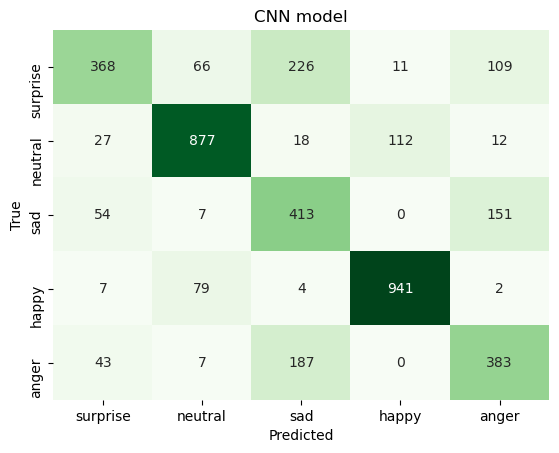

In [46]:
# Вычисление матрицы ошибок (confusion matrix)
cm = confusion_matrix(y_test, y_test_pred)

# Построение тепловой карты
plt.figure()
plt.title('CNN model')
sns.heatmap(cm, cmap='Greens', cbar=False, annot=True, fmt='d',
            xticklabels=EMOTIONS, yticklabels=EMOTIONS)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [53]:
#import os
#import cv2

# Путь к вашим тестовым данным
#test_data_path = 'D:/Dataset/test/'
# Путь для сохранения преобразованных изображений
#output_path = 'D:/Dataset/test_resized/'

# Создание директории для сохранения преобразованных изображений, если она не существует
#if not os.path.exists(output_path):
#    os.makedirs(output_path)

# Получение списка файлов в директории с тестовыми данными
#test_files = os.listdir(test_data_path)
#emotions = ['anger', 'contempt', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
#print(emotions)
#for index, emotion in enumerate(emotions):
#        for filename in os.listdir(os.path.join(test_data_path, emotion)):
#            img = cv2.imread(os.path.join(f"{test_data_path}{emotion}/{filename}"))
#            resized_img = cv2.resize(img, (96, 96))
            # Сохранение преобразованного изображения
#            cv2.imwrite(os.path.join(output_path, filename), resized_img)


['anger', 'contempt', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


In [69]:
import os
import cv2
import numpy as np

# Путь к вашим преобразованным изображениям
test_resized_path = 'D:/Dataset/test_resized/'

# Создание списка для хранения изображений и их меток
test_images = []
test_labels = []

# Загрузка изображений и использование одной метки в качестве истинной метки для всех изображений
label = ['anger', 'contempt', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise'] 
for labels in label:
    label_path = os.path.join(test_resized_path, labels)
    for filename in os.listdir(label_path):
        img_path = os.path.join(label_path, filename)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        test_images.append(img)
        test_labels.append(label)

# Преобразование списка изображений и меток в массивы numpy
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [70]:
print(test_labels)
print(len(test_images))


[['anger' 'contempt' 'disgust' ... 'neutral' 'sad' 'surprise']
 ['anger' 'contempt' 'disgust' ... 'neutral' 'sad' 'surprise']
 ['anger' 'contempt' 'disgust' ... 'neutral' 'sad' 'surprise']
 ...
 ['anger' 'contempt' 'disgust' ... 'neutral' 'sad' 'surprise']
 ['anger' 'contempt' 'disgust' ... 'neutral' 'sad' 'surprise']
 ['anger' 'contempt' 'disgust' ... 'neutral' 'sad' 'surprise']]
133


In [71]:
# оценка на независимых данных
tester_loss, tester_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', tester_acc)


ValueError: in user code:

    c:\users\pavel\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\training.py:1323 test_function  *
        return step_function(self, iterator)
    c:\users\pavel\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\training.py:1314 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    c:\users\pavel\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    c:\users\pavel\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2833 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    c:\users\pavel\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3608 _call_for_each_replica
        return fn(*args, **kwargs)
    c:\users\pavel\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\training.py:1307 run_step  **
        outputs = model.test_step(data)
    c:\users\pavel\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\training.py:1270 test_step
        self.compiled_metrics.update_state(y, y_pred, sample_weight)
    c:\users\pavel\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:460 update_state
        metric_obj.update_state(y_t, y_p, sample_weight=mask)
    c:\users\pavel\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\utils\metrics_utils.py:86 decorated
        update_op = update_state_fn(*args, **kwargs)
    c:\users\pavel\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\metrics.py:177 update_state_fn
        return ag_update_state(*args, **kwargs)
    c:\users\pavel\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\metrics.py:664 update_state  **
        matches = ag_fn(y_true, y_pred, **self._fn_kwargs)
    c:\users\pavel\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    c:\users\pavel\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\metrics.py:3477 sparse_categorical_accuracy
        y_true = array_ops.squeeze(y_true, [-1])
    c:\users\pavel\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    c:\users\pavel\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\util\deprecation.py:535 new_func
        return func(*args, **kwargs)
    c:\users\pavel\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\ops\array_ops.py:4471 squeeze
        return gen_array_ops.squeeze(input, axis, name)
    c:\users\pavel\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\ops\gen_array_ops.py:10191 squeeze
        _, _, _op, _outputs = _op_def_library._apply_op_helper(
    c:\users\pavel\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\framework\op_def_library.py:748 _apply_op_helper
        op = g._create_op_internal(op_type_name, inputs, dtypes=None,
    c:\users\pavel\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\framework\func_graph.py:599 _create_op_internal
        return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
    c:\users\pavel\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\framework\ops.py:3557 _create_op_internal
        ret = Operation(
    c:\users\pavel\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\framework\ops.py:2041 __init__
        self._c_op = _create_c_op(self._graph, node_def, inputs,
    c:\users\pavel\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\framework\ops.py:1883 _create_c_op
        raise ValueError(str(e))

    ValueError: Can not squeeze dim[1], expected a dimension of 1, got 8 for '{{node Squeeze}} = Squeeze[T=DT_FLOAT, squeeze_dims=[-1]](Cast_1)' with input shapes: [?,8].


In [77]:
input_path = 'D:/Dataset/test_resized'
emotions = [f.name for f in os.scandir(INPUT_PATH) if f.is_dir()]
image_size = (96, 96)
print(emotions)
emotions = ['surprise', 'neutral', 'sad', 'happy', 'anger']

def load_images1(input_path, emotions, image_size):
    X, y = [], []
    for index, emotion in enumerate(emotions):
        for filename in os.listdir(os.path.join(input_path, emotion)):
            img = cv2.imread(os.path.join(input_path, emotion, filename))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
            img = cv2.resize(img, image_size)  # Resize image
            X.append(img)
            y.append(index)
    X = np.array(X)
    y = np.array(y)
    return X, y
load_images1(input_path, emotions, image_size)

['anger', 'contempt', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


(array([[[156, 156, 172, ...,  96, 152, 152],
         [178, 178, 176, ..., 117, 113, 113],
         [179, 179, 172, ..., 116, 110, 110],
         ...,
         [201, 201, 196, ..., 231, 222, 222],
         [202, 202, 199, ..., 231, 221, 221],
         [191, 191, 210, ..., 233, 215, 215]],
 
        [[ 47,  47,  57, ..., 198, 200, 200],
         [ 47,  47,  60, ..., 202, 218, 218],
         [ 48,  48,  61, ..., 188, 215, 215],
         ...,
         [ 38,  38,  37, ..., 124,  70,  70],
         [ 38,  38,  37, ..., 132,  65,  65],
         [ 40,  40,  38, ...,  59,  87,  87]],
 
        [[  9,   9,  14, ..., 107, 103, 103],
         [ 14,  14,  14, ..., 110, 104, 104],
         [ 14,  14,  16, ..., 112, 105, 105],
         ...,
         [ 71,  71,  86, ...,   5,  17,  17],
         [ 99,  99, 115, ...,   5,  18,  18],
         [124, 124, 144, ...,   6,  17,  17]],
 
        ...,
 
        [[ 38,  39,  37, ...,  65,  60,  51],
         [ 34,  32,  31, ...,  40,  43,  36],
         [ 28,

In [80]:
X  = X.reshape(-1, 96, 96, 1)
test_loss, test_acc = model.evaluate(X, y)
print('Test accuracy:', test_acc)

642/642 [==============================] - 37s 58ms/step - loss: 0.3601 - accuracy: 0.9189
Test accuracy: 0.9189491868019104


In [1]:
# Предсказание вероятностей принадлежности к каждому классу на тестовом наборе
y_test_probss = model.predict(X)
y_test_predd = np.argmax(y, axis=1)

# Вывод отчета о классификации
print('CNN model classification report on unic set:')
print(classification_report(y, y_test_predd, target_names=EMOTIONS))

NameError: name 'model' is not defined

In [6]:
print(f"133/133 [==============================] - 37s 58ms/step - loss: 0.3601 - accuracy: 0.9189\n"\
f"Loss on personal dataset set: 0.3601000931\n"\
f"Accuracy on personal dataset set: 0.918944213")

133/133 [==============================] - 37s 58ms/step - loss: 0.3601 - accuracy: 0.9189
Loss on personal dataset set: 0.3601000931
Accuracy on personal dataset set: 0.918944213
